In [1]:
library(Seurat)
library(future)
plan("multicore", workers = 32)
options(future.globals.maxSize = 8000 * 1024^2)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built with package ‘Matrix’ 1.6.4 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




- 读取scRNA-seq数据
- 删除不重合细胞、添加细胞类型
- 预处理
  - 归一化
  - 高变基因
  - 缩放、PCA、TSNE、UMAP
- 保存预处理后的scRNA-seq(./data/{batch}.rds)

In [15]:
batches <- c("10N", '10T', '12N', '12T', '13T', '19T', '20T', '21T', '22T')

In [16]:
dataPath = "/data/BCY/BCY-pair/"
cellTypePath = "./data/"

In [17]:
for (batch in batches) {
  batch_number = gsub("\\D", "", batch)
  filePath = paste0(dataPath, batch_number, "/", batch, "-scRNA/")
  print(filePath)
  # Load the data
  data <- Read10X(data.dir = filePath)
  # Create a Seurat object
  rna <- CreateSeuratObject(counts = data, project = batch)
  print(rna)
  # 删除不存在在cellType_filePath中的细胞
  cellType_filePath = paste0(cellTypePath, batch, ".csv")
  print(cellType_filePath)
  cell_types <- read.csv(cellType_filePath, stringsAsFactors = FALSE)
  rna <- subset(rna, cells = cell_types$cell)
  print(rna)
  # 将 CSV 中的细胞类型添加到 rna 中
  rna$majorType <- cell_types$majorType[match(colnames(rna), cell_types$cell)]
  Idents(rna) <- "majorType"
  # Normalize the data
  rna <- NormalizeData(rna, normalization.method = "LogNormalize", scale.factor = 10000)
  # Find variable features
  rna <- FindVariableFeatures(rna, selection.method = "vst", nfeatures = 3000)
  # Scale the data
  rna <- ScaleData(rna)
  # Run PCA
  rna <- RunPCA(rna, npcs = 100)
  rna <- RunTSNE(rna, dims = 1:20)
  rna <- FindNeighbors(rna, dims = 1:20)
  rna <- RunUMAP(rna, dims = 1:20)
  DimPlot(rna, label = TRUE, reduction = "umap")
  # Save the Seurat object
  saveRDS(rna, paste0('./data/', batch, ".rds"))
}

[1] "/data/BCY/BCY-pair/10/10N-scRNA/"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
61487 features across 9094 samples within 1 assay 
Active assay: RNA (61487 features, 0 variable features)
 1 layer present: counts
[1] "./data/10N.csv"
An object of class Seurat 
61487 features across 8191 samples within 1 assay 
Active assay: RNA (61487 features, 0 variable features)
 1 layer present: counts


Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  LGALS1, COL1A2, COL6A2, LUM, COL3A1, COL1A1, SPARC, COL6A3, MMP2, COL6A1 
	   CTSK, SPON2, SFRP2, APOD, CCDC80, FN1, NID1, DLK1, TIMP1, OLFML3 
	   TIMP3, CD248, VCAN, MFAP4, PCOLCE, OAF, PDGFRB, MEG3, COL14A1, IGF1 
Negative:  KRT18, KRT8, CLDN4, TACSTD2, CD24, KRT19, AZGP1, CLDN3, CLDN7, EHF 
	   SPINT2, KRT7, ELF3, ELAPOR1, DSP, KRT15, TM4SF1, CCL28, PERP, PIGR 
	   ELF5, KIT, CITED4, DSC2, TRPS1, SERINC2, SCGB3A1, GABRP, RAB25, RBM47 
PC_ 2 
Positive:  SRGN, LAPTM5, CXCR4, PTPRC, RGS1, TNFAIP3, HLA-DPA1, DUSP2, CD69, FYB1 
	   CD74, LCP1, HLA-DPB1, CORO1A, CCL4, HLA-DRB1, CD37, CCL4L2, HLA-DQB1, TYROBP 
	   HCLS1, LCP2, ITGB2, HLA-DRA, HLA-DRB5, HLA-DQA1, CCL3L3, CYTIP, C1QC, CCL3 
Negative:  MGP, COL1A2, COL1A1, COL3A1, COL6A2, LUM, TIMP1, COL6A1, COL6A3, MMP2 
	   CRABP2, SFRP2, FN1, FSTL1, CTSK, DLK1, CCDC80, CCN2, COL14A1, SPON2 
	   THBS2, VCAN, CD248, NI

[1] "/data/BCY/BCY-pair/10/10T-scRNA/"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
61487 features across 7923 samples within 1 assay 
Active assay: RNA (61487 features, 0 variable features)
 1 layer present: counts
[1] "./data/10T.csv"
An object of class Seurat 
61487 features across 7251 samples within 1 assay 
Active assay: RNA (61487 features, 0 variable features)
 1 layer present: counts


Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  BAG1, NPY1R, CLDN4, HSPB8, GFRA1, TACSTD2, STC2, GSTM3, IER3, ECM1 
	   ELF3, RAB11FIP1, DCXR, CAMK2N1, DSP, INSYN2A, KCNE4, FASN, KIF12, RAMP1 
	   TCEAL4, CCDC74A, TCEAL3, SREBF1, NRIP1, CLDN3, H1-2, CD24, EEF1A2, DCLK1 
Negative:  VIM, HTRA1, A2M, MARCKS, GSTP1, MEF2C, IFI16, FN1, TCF4, TGFBI 
	   TGFB1, SGK1, IGFBP7, APOE, TACC1, ZEB2, SPARC, PLXDC2, HLA-DRB1, CD74 
	   CALD1, SERPINF1, HLA-DRA, LAPTM5, TYROBP, BGN, SPARCL1, ANXA1, TGFBR2, PLTP 
PC_ 2 
Positive:  STC2, MAGED2, EFNA1, BHLHE40, IL6ST, CEBPD, JUNB, ZFP36, BTG2, FTL 
	   CST3, GADD45B, TSC22D1, CLDN4, NPY1R, SOCS3, PRSS23, ELF3, RAB31, CLU 
	   PLAT, SAT1, DUSP1, SEMA3B, IGFBP5, CRISPLD1, GLRB, CSRNP1, SERPINA5, TPM1 
Negative:  MKI67, ZWINT, CDK1, UBE2T, TYMS, TOP2A, STMN1, UBE2C, TPX2, CDKN3 
	   ANLN, KIFC1, ASF1B, RRM2, BIRC5, PBK, HJURP, PKMYT1, CCNA2, SPC25 
	   BUB1B, KIF4A, DIAPH3, CDCA3, 

[1] "/data/BCY/BCY-pair/12/12N-scRNA/"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
61487 features across 8831 samples within 1 assay 
Active assay: RNA (61487 features, 0 variable features)
 1 layer present: counts
[1] "./data/12N.csv"
An object of class Seurat 
61487 features across 8345 samples within 1 assay 
Active assay: RNA (61487 features, 0 variable features)
 1 layer present: counts


Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  IGFBP7, SPARCL1, IFI27, TXNIP, A2M, SPARC, ADAMTS1, CAV1, GNG11, KLF2 
	   TGFBR2, CD34, PECAM1, EGFL7, ESAM, VWF, CLDN5, ENG, CAVIN2, AQP1 
	   PLVAP, FABP4, S1PR1, CD36, ID3, HSPG2, ADGRL4, COL15A1, KCTD12, JAM2 
Negative:  AZGP1, CLDN4, KRT18, CD24, KRT19, ELF3, ELAPOR1, KRT8, DHCR24, CLDN7 
	   TACSTD2, ANKRD30A, BAMBI, SPINT2, SCUBE2, NEDD4L, FBP1, DSP, CDH1, XBP1 
	   RHOV, PRLR, MAL2, RBM47, EPCAM, FOXA1, AFF3, RASEF, ZG16B, FAM3B 
PC_ 2 
Positive:  PECAM1, VWF, EGFL7, PLVAP, CLDN5, ADGRL4, RAMP2, FLT1, S1PR1, AQP1 
	   CYYR1, HLA-DRB1, EMCN, ACKR1, CLEC14A, CAVIN2, C2CD4B, SOX18, CDH5, PTPRB 
	   CD74, DIPK2B, MMRN2, CD93, NPDC1, HLA-DRB5, ADAM15, THBD, CD34, HLA-DRA 
Negative:  COL6A2, RARRES2, SERPINF1, COL1A2, COL14A1, C1S, AEBP1, DCN, COL1A1, PCOLCE 
	   SFRP2, CCDC80, LUM, MFAP4, LRP1, COL6A1, FBLN1, PLTP, COL3A1, C1R 
	   COL6A3, CTSK, OLFML3, ISLR, 

[1] "/data/BCY/BCY-pair/12/12T-scRNA/"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
61487 features across 9536 samples within 1 assay 
Active assay: RNA (61487 features, 0 variable features)
 1 layer present: counts
[1] "./data/12T.csv"
An object of class Seurat 
61487 features across 8773 samples within 1 assay 
Active assay: RNA (61487 features, 0 variable features)
 1 layer present: counts


Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  CD74, HLA-DRB1, TM4SF1, PECAM1, HLA-DRA, HLA-DRB5, HLA-DPA1, TSPAN13, ETS2, RNASE1 
	   CD93, ADGRL4, PLVAP, VWF, HLA-DPB1, HLA-DMA, ITGA6, EGFL7, PNP, FLT1 
	   S1PR1, CYYR1, EMCN, CLEC14A, DIPK2B, MCTP1, PTPRB, RAMP2, CLDN5, ADAM15 
Negative:  COL1A2, COL6A2, COL1A1, COL6A1, COL3A1, LUM, DCN, COL6A3, C1S, AEBP1 
	   PCOLCE, CTSK, LRP1, SFRP2, CCDC80, MXRA8, ISLR, BGN, RARRES2, COL14A1 
	   C1R, MFAP4, FBLN1, MXRA5, FN1, COL5A2, MGP, OLFML3, SERPINF1, VCAN 
PC_ 2 
Positive:  PECAM1, AQP1, ADGRL4, PLVAP, VWF, CD93, ENG, RNASE1, CD34, CLEC14A 
	   EMCN, EGFL7, FLT1, CYYR1, DIPK2B, RAMP2, PTPRB, A2M, S1PR1, CDH5 
	   IFI27, HSPG2, RAMP3, MMRN2, CALCRL, ITGA6, PALMD, CLDN5, SOX18, SHANK3 
Negative:  CLDN4, ELF3, AZGP1, CD24, CLDN7, KRT19, CLDN3, KRT8, PRLR, KRT18 
	   SPDEF, RAB11FIP1, CDH1, NPB, TFAP2A, MUC1, SMIM22, SPINT2, ANKRD30A, S100A14 
	   FOXA1, FXYD3, SLC3

[1] "/data/BCY/BCY-pair/13/13T-scRNA/"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
61487 features across 8955 samples within 1 assay 
Active assay: RNA (61487 features, 0 variable features)
 1 layer present: counts
[1] "./data/13T.csv"
An object of class Seurat 
61487 features across 8349 samples within 1 assay 
Active assay: RNA (61487 features, 0 variable features)
 1 layer present: counts


Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  CLDN4, KRT18, DSP, KRT8, AZGP1, TACSTD2, SPINT2, CD24, ELF3, CLDN7 
	   CDH1, EPCAM, ELAPOR1, KRT7, NEDD4L, RBM47, SDC4, WFDC2, ATP1B1, BAMBI 
	   EHF, CRACR2B, SHROOM3, XBP1, TSTD1, CLDN3, RASEF, RHOV, TMEM238, DHCR24 
Negative:  SPARC, IGFBP7, TIMP2, COL6A2, COL1A2, CCN2, HTRA1, TIMP3, LGALS1, SPARCL1 
	   ID3, DCN, COL6A1, COL3A1, C1S, IFI27, VCAN, COL1A1, FN1, LUM 
	   PCOLCE, AEBP1, SERPINF1, CCDC80, FSTL1, COL6A3, MFAP4, PLAC9, MMP2, BGN 
PC_ 2 
Positive:  COL1A2, COL6A2, COL1A1, COL6A1, DCN, COL3A1, LUM, FBLN1, C1S, PCOLCE 
	   SFRP2, CCDC80, COL6A3, RARRES2, MFAP4, AEBP1, CTSK, SERPINF1, MXRA8, MXRA5 
	   MMP2, COL14A1, OLFML3, LRP1, ISLR, MGP, COL5A2, CRABP2, C1R, PDGFRL 
Negative:  CD74, HLA-DRB1, SRGN, HLA-DRA, HLA-DRB5, HLA-DPA1, HLA-DPB1, PECAM1, HLA-DMA, PLVAP 
	   EGFL7, RNASE1, VWF, EMCN, HLA-DQB1, AQP1, HLA-DQA1, ADGRL4, CD93, FLT1 
	   HLA-DQA2, 

[1] "/data/BCY/BCY-pair/19/19T-scRNA/"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
61487 features across 9763 samples within 1 assay 
Active assay: RNA (61487 features, 0 variable features)
 1 layer present: counts
[1] "./data/19T.csv"
An object of class Seurat 
61487 features across 8881 samples within 1 assay 
Active assay: RNA (61487 features, 0 variable features)
 1 layer present: counts


Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  COL1A2, COL6A2, COL3A1, COL1A1, DCN, LUM, COL6A3, COL6A1, C1S, PCOLCE 
	   SFRP2, SERPINF1, CCDC80, FBLN1, CTSK, AEBP1, COL14A1, ISLR, LRP1, MMP2 
	   MFAP4, COL5A2, LGALS1, MXRA8, RARRES2, OLFML3, C1R, PLTP, VCAN, COL5A1 
Negative:  CD74, HLA-DRB1, PECAM1, HLA-DRA, AQP1, VWF, EGFL7, CLDN5, HLA-DPA1, RNASE1 
	   HLA-DMA, HLA-DPB1, ADGRL4, PLVAP, EMCN, TM4SF1, HLA-DRB5, HLA-DQB1, SOX18, GNG11 
	   GIMAP7, RAMP2, ACKR1, CLEC14A, CYYR1, ITGA6, PALMD, CD93, DIPK2B, MCTP1 
PC_ 2 
Positive:  IFI27, SPARC, GNG11, PECAM1, VWF, CCN2, CLDN5, AQP1, EGFL7, COL15A1 
	   ADGRL4, PLVAP, IL33, EMCN, ENG, TIMP3, SOX18, RAMP2, CLEC14A, RNASE1 
	   GIMAP7, NRN1, DIPK2B, ACKR1, MMRN2, CAVIN2, CYYR1, CDH5, PALMD, CD93 
Negative:  SPINT2, CLDN4, AZGP1, ELAPOR1, AGR2, CLDN7, KRT19, EPCAM, TACSTD2, ELF3 
	   SMIM22, CDH1, KRT8, DSP, TFF3, AREG, ZG16B, TSTD1, TFF1, SLC39A6 
	   CD24, KRT1

[1] "/data/BCY/BCY-pair/20/20T-scRNA/"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
61487 features across 11777 samples within 1 assay 
Active assay: RNA (61487 features, 0 variable features)
 1 layer present: counts
[1] "./data/20T.csv"
An object of class Seurat 
61487 features across 10880 samples within 1 assay 
Active assay: RNA (61487 features, 0 variable features)
 1 layer present: counts


Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  CLDN3, CLDN4, KRT18, KRT8, S100A14, ELF3, AZGP1, MLPH, MAL2, DSP 
	   BAMBI, EPCAM, KRT19, LY6K, PLPP2, DEGS2, NQO1, RAB25, ESRP1, SPDEF 
	   IGFBP2, ERBB3, IRX3, CLDN7, CYP2B7P, LAPTM4B, TFF3, EFNA1, JUP, METRN 
Negative:  CD74, LCP1, RGS1, ITGB2, HLA-DPB1, HLA-DPA1, HLA-DRB1, TYROBP, HLA-DRB5, HLA-DRA 
	   CD83, FCER1G, RGS2, HLA-DQA1, NR4A3, CCL5, HLA-DQA2, CD7, CCL4, ADA2 
	   HLA-DQB1, ALOX5AP, GPR183, NKG7, CST7, PLEK, AIF1, C1orf162, LTB, SPI1 
PC_ 2 
Positive:  COL1A2, COL6A1, COL3A1, AEBP1, COL1A1, COL6A3, SPARC, FSTL1, LUM, CCDC80 
	   FBN1, FN1, COL5A2, THBS2, MMP2, CD248, CCN2, CTSK, COL12A1, COL5A1 
	   SFRP2, MXRA5, BGN, EFEMP1, DPYSL3, COL14A1, TIMP1, MFAP5, RARRES2, TIMP3 
Negative:  CD74, LCP1, HLA-DRB1, RGS1, ITGB2, SYNGR2, CD83, SPINT2, UCP2, HLA-DRB5 
	   HLA-DPB1, HLA-DRA, HLA-DPA1, TYROBP, HLA-DQA1, FCER1G, HLA-DQA2, KRT19, HSPD1, HLA-DMA 
	 

[1] "/data/BCY/BCY-pair/21/21T-scRNA/"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
61487 features across 12131 samples within 1 assay 
Active assay: RNA (61487 features, 0 variable features)
 1 layer present: counts
[1] "./data/21T.csv"
An object of class Seurat 
61487 features across 10761 samples within 1 assay 
Active assay: RNA (61487 features, 0 variable features)
 1 layer present: counts


Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  SPARC, CALD1, COL6A2, IGFBP7, COL1A2, COL6A1, COL3A1, FN1, BGN, SERPING1 
	   COL6A3, HTRA1, FSTL1, AEBP1, CAVIN1, LUM, COL18A1, SPARCL1, COL1A1, NID1 
	   COL5A2, THY1, PCOLCE, IGFBP4, PDGFRB, VIM, LAMA4, GSN, VCAN, COL4A2 
Negative:  S100A14, ERBB2, MIEN1, PTRH2, ELF3, GPRC5A, CLDN4, KRT7, AZGP1, ARMT1 
	   MUC1, TACSTD2, USP32, TOB1, GFRA1, COX6C, ALDH3B2, DHCR24, AARD, ST6GALNAC2 
	   CKS2, MZB1, SLC39A6, PKIB, RAD21, H1-2, AKR7A3, EEF1A2, CNTNAP2, MYO5B 
PC_ 2 
Positive:  ERBB2, MDK, S100A14, GPRC5A, PTRH2, MIEN1, IGFBP2, ELF3, MT1E, GFRA1 
	   KRT7, MT2A, CLDN4, SLC39A6, ARMT1, TPM1, H2AJ, AZGP1, TACSTD2, USP32 
	   DHCR24, MUC1, MAGED2, COX6C, RANBP1, CRABP2, ECM1, HMGN2, ALDH3B2, ST6GALNAC2 
Negative:  CD74, SRGN, LAPTM5, HLA-DRB1, HLA-DRB5, HLA-DPA1, HLA-DRA, HLA-DPB1, TYROBP, CXCR4 
	   HLA-DQA1, ITGB2, RGS1, CD37, HLA-DQB1, CD83, NR4A2, HLA-DMA, CORO1A,

[1] "/data/BCY/BCY-pair/22/22T-scRNA/"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
61487 features across 10896 samples within 1 assay 
Active assay: RNA (61487 features, 0 variable features)
 1 layer present: counts
[1] "./data/22T.csv"
An object of class Seurat 
61487 features across 10212 samples within 1 assay 
Active assay: RNA (61487 features, 0 variable features)
 1 layer present: counts


Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  MZB1, GZMB, CD79A, ITM2C, IGHG4, IGHG3, CXCL13, JCHAIN, GNLY, ANKRD37 
	   IGLC2, ZNF683, POU2AF1, DERL3, IRF4, LINC02446, JSRP1, TNFRSF4, IGHGP, TNFRSF17 
	   CCL4, KLRB1, ENSG00000259772, IL7R, IGLC3, IGKC, IGLL5, FCRL5, IGHV3-21, IGLV3-21 
Negative:  MDK, MXRA5, RARRES1, APP, ENAH, CALD1, CRABP2, KRT19, KRT8, C1S 
	   CDK2AP1, COL4A2, S100A13, ISLR, COL6A1, CLU, CLDN4, CDC42EP1, KRT7, COL6A2 
	   CNN3, PPIC, CALML5, GOLM1, NFIX, RCN3, TMEM54, NES, TM4SF1, S100A16 
PC_ 2 
Positive:  CRABP2, KRT19, CDKN2A, KRT8, CALML5, CD24, KRT7, KRT18, PPP1R1B, CDC42EP4 
	   FDCSP, CITED4, PRDX2, CLU, ELF5, FABP7, CLDN4, MARCKSL1, ASS1, MYC 
	   TMEM54, CRABP1, MMP7, TM4SF1, ELF3, SOX9, PITX1, CKS1B, MGP, UBE2C 
Negative:  CST3, TMEM176B, FCER1G, FCGR3A, TIMP2, SERPINA1, LILRB4, TYROBP, C1QC, C1QA 
	   MS4A6A, C1QB, CD14, CYBB, LYZ, CTSL, SPI1, APOC1, AIF1, CXCL9 
	   SERPING1

[1] "/data/BCY/BCY-pair/11/11-scRNA/"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
61487 features across 9508 samples within 1 assay 
Active assay: RNA (61487 features, 0 variable features)
 1 layer present: counts
[1] "./data/11T.csv"
An object of class Seurat 
61487 features across 8423 samples within 1 assay 
Active assay: RNA (61487 features, 0 variable features)
 1 layer present: counts


Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  ELF3, CLDN4, KRT19, AZGP1, PRLR, ERBB3, KRT8, DHCR24, CD24, FOXA1 
	   MAL2, KRT18, KRT7, CLDN3, CLDN7, ENSG00000244468, PIP, TFAP2B, SPDEF, CDH1 
	   AP1M2, BAMBI, SERINC2, PRSS8, AGR2, MUC1, SPINT2, IRF6, EHF, TMC5 
Negative:  SPARC, TIMP3, HTRA1, CD69, COL6A2, CORO1A, CST3, COL4A2, LAPTM5, SPRY1 
	   COL4A1, COL18A1, COL6A1, BGN, COL1A2, FBN1, COL15A1, SERPINF1, COL3A1, CCN2 
	   PECAM1, MMP2, CCL5, AEBP1, COL1A1, VCAN, RGS1, PCOLCE, AQP1, C1S 
PC_ 2 
Positive:  CD74, HLA-DRB1, HLA-DQB1, HLA-DRA, LAPTM5, HLA-DPA1, HLA-DPB1, DUSP2, CD69, COTL1 
	   CORO1A, HLA-DRB5, LCP1, PECAM1, HLA-DMA, RGS1, HLA-DQA1, PLVAP, RNASE1, VWF 
	   CD93, ITGB2, LCP2, TUBA4A, MCTP1, EGFL7, EMCN, FLT1, ADGRL4, PDE4B 
Negative:  COL1A2, COL3A1, COL1A1, COL6A3, FBLN1, COL6A1, LUM, DCN, C1S, CTSK 
	   SFRP2, CCDC80, COL6A2, MXRA8, AEBP1, SERPINF1, COL5A2, THBS2, PCOLCE, ISLR 
	   MXRA5, 

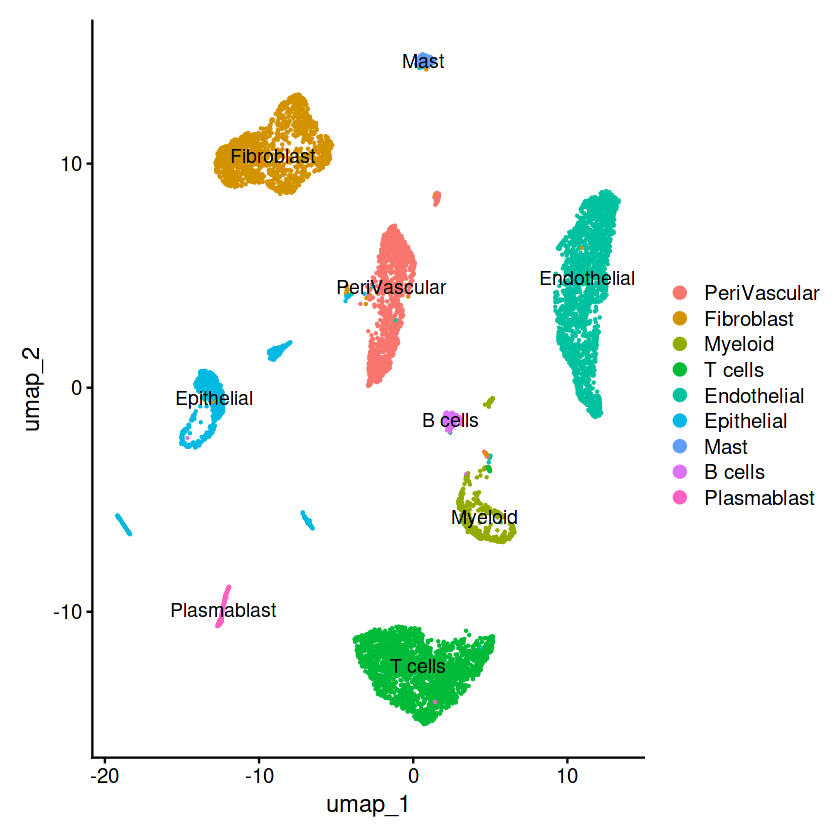

In [18]:
batch = "11T"
# '11T'在读取数据时出现问题，需要单独处理，原数据 命名规则不同
filePath = paste0(dataPath, "11/11-scRNA/")
print(filePath)
# Load the data
data <- Read10X(data.dir = filePath)
# Create a Seurat object
rna <- CreateSeuratObject(counts = data, project = batch)
print(rna)
# 删除不存在在cellType_filePath中的细胞
cellType_filePath = paste0(cellTypePath, batch, ".csv")
print(cellType_filePath)
cell_types <- read.csv(cellType_filePath, stringsAsFactors = FALSE)
rna <- subset(rna, cells = cell_types$cell)
print(rna)
# 将 CSV 中的细胞类型添加到 rna 中
rna$majorType <- cell_types$majorType[match(colnames(rna), cell_types$cell)]
Idents(rna) <- "majorType"
# Normalize the data
rna <- NormalizeData(rna, normalization.method = "LogNormalize", scale.factor = 10000)
# Find variable features
rna <- FindVariableFeatures(rna, selection.method = "vst", nfeatures = 3000)
# Scale the data
rna <- ScaleData(rna)
# Run PCA
rna <- RunPCA(rna, npcs = 100)
rna <- RunTSNE(rna, dims = 1:20)
rna <- FindNeighbors(rna, dims = 1:20)
rna <- RunUMAP(rna, dims = 1:20)
DimPlot(rna, label = TRUE, reduction = "umap")
# Save the Seurat object
saveRDS(rna, paste0('./data/', batch, ".rds"))